# IMPORTING THE DATASET

In [1]:
import pandas as pd
df=pd.read_csv("loan_prediction.csv")
print (df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

614 rows and 13 columns

# CHECKING NULL VALUES

In [6]:
import numpy as np
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

gender,married,dependents,self employed,loan amount,loan amount term,credit histry these columns have null values

FILLING NULL VALUES

In [7]:
df['Gender'].value_counts().index[0]

'Male'

In [8]:
df['Gender'].fillna(df['Gender'].value_counts().index[0],inplace=True)

In [9]:
df['Gender'].isnull().sum()

0

In [10]:
df['Married'].fillna(df['Married'].value_counts().index[0],inplace=True)

In [11]:
df['Married'].isnull().sum()

0

In [12]:
df['Dependents'].fillna(df['Dependents'].value_counts().index[0],inplace=True)

In [13]:
df['Dependents'].isnull().sum()

0

In [14]:
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0],inplace=True)

In [15]:
df['Self_Employed'].isnull().sum()

0

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].value_counts().index[0],inplace=True)

In [17]:
df['LoanAmount'].isnull().sum()

0

In [18]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().index[0],inplace=True)

In [19]:
df['Loan_Amount_Term'].isnull().sum()

0

In [20]:
df['Credit_History'].fillna(df['Credit_History'].value_counts().index[0],inplace=True)

In [21]:
df['Credit_History'].isnull().sum()

0

# ENCODING CATEGORICAL COLUMNS

In [22]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Loan_ID"]=LE.fit_transform(df["Loan_ID"])

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Gender"]=LE.fit_transform(df["Gender"])

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Married"]=LE.fit_transform(df["Married"])

In [25]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Education"]=LE.fit_transform(df["Education"])

In [26]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Self_Employed"]=LE.fit_transform(df["Self_Employed"])

In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Property_Area"]=LE.fit_transform(df["Property_Area"])

In [28]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Loan_Status"]=LE.fit_transform(df["Loan_Status"])

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# CHECKING CORRELATION

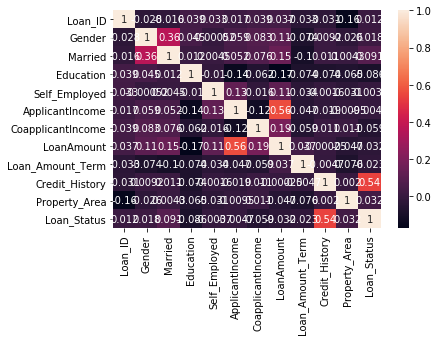

In [30]:
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

map is not clear so creating correlation table

In [31]:
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Education,0.039442,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.106404,0.146212,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,-0.030603,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


Loan id and gender have very weak correlation dropping both

In [32]:
df.drop('Gender',axis=1,inplace=True)

In [33]:
df.drop('Loan_ID',axis=1,inplace=True)

# CHECKING DATA TYPES

In [35]:
df.dtypes

Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

we have seen that dependents column has numerical data but dtype is showing object so checking closely

In [36]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

it has variable 3+ which is a string type of variable so converting it to numerical

In [38]:
df['Dependents']=df['Dependents'].str.replace('+','').astype(int)

In [39]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [40]:
df.dtypes

Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [41]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# SCALING THE DATA

In [42]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaled = mms.fit_transform(df)
print(scaled)

[[0.         0.         0.         ... 1.         1.         1.        ]
 [1.         0.33333333 0.         ... 1.         0.         0.        ]
 [1.         0.         0.         ... 1.         1.         1.        ]
 ...
 [1.         0.33333333 0.         ... 1.         1.         1.        ]
 [1.         0.66666667 0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 0.         0.5        0.        ]]


SPLITTING INTO X AND Y 

In [43]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]
x.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [44]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

# BUILDING MODELS(RANDOM FOREST)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0) 

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [51]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1])

In [52]:
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest Classification is:  0.7339901477832512


In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [54]:
cm

array([[ 28,  30],
       [ 24, 121]], dtype=int64)

# SVC

In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1])

In [59]:
from sklearn import metrics
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.8226600985221675


In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 25  33]
 [  3 142]]


In [61]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [62]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0])

In [63]:
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree Classifier is:  0.7586206896551724


# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred = classifier.predict(x_test)

In [66]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1])

In [67]:
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.6551724137931034


SVC is the best model as we are getting 82% accuracy